#Import Libraries

In [ ]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.metrics import classification_report, roc_curve
from sklearn.model_selection import GridSearchCV

#Load dataset

In [ ]:
#import dataset
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


#Cleaning Data (Handling missing value)

In [ ]:
#delete duplicates
df =df.drop_duplicates()

In [ ]:
#reset index
df = df.reset_index(drop = True)

In [ ]:
#find null value
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#seeing data in each column with categorical data
print(Counter(df['gender']))
print(Counter(df['hypertension']))
print(Counter(df['heart_disease']))
print(Counter(df['ever_married']))
print(Counter(df['work_type']))
print(Counter(df['Residence_type']))
print(Counter(df['smoking_status']))

Counter({'Female': 2994, 'Male': 2115, 'Other': 1})
Counter({0: 4612, 1: 498})
Counter({0: 4834, 1: 276})
Counter({'Yes': 3353, 'No': 1757})
Counter({'Private': 2925, 'Self-employed': 819, 'children': 687, 'Govt_job': 657, 'Never_worked': 22})
Counter({'Urban': 2596, 'Rural': 2514})
Counter({'never smoked': 1892, 'Unknown': 1544, 'formerly smoked': 885, 'smokes': 789})


In [ ]:
#drop 'other' from gender
other = df[df['gender'] == 'Other'].index
df.drop(other, axis=0, inplace= True)

In [ ]:
#seeing data after drop
print(Counter(df['gender']))
print(Counter(df['hypertension']))
print(Counter(df['heart_disease']))
print(Counter(df['ever_married']))
print(Counter(df['work_type']))
print(Counter(df['Residence_type']))
print(Counter(df['smoking_status']))

Counter({'Female': 2994, 'Male': 2115})
Counter({0: 4611, 1: 498})
Counter({0: 4833, 1: 276})
Counter({'Yes': 3353, 'No': 1756})
Counter({'Private': 2924, 'Self-employed': 819, 'children': 687, 'Govt_job': 657, 'Never_worked': 22})
Counter({'Urban': 2596, 'Rural': 2513})
Counter({'never smoked': 1892, 'Unknown': 1544, 'formerly smoked': 884, 'smokes': 789})


[source](https://www.kemkes.go.id/index.php?txtKeyword=status+gizi&act=search-by-map&pgnumber=0&charindex=&strucid=1280&fullcontent=1&C-ALL=1)

Untuk Perempuan :
Kurus : < 17 kg/m2
Normal : 17 - 23 kg/ m2
Kegemukan : 23 - 27 kg/m2
Obesitas : > 27 kg/m

Untuk Laki-laki :
Kurus : < 18 kg/m2
Normal : 18 - 25 kg/m2
Kegemukan : 25 - 27 kg/m2
Obesitas : > 27 kg/m2

In [ ]:
#changing BMI from numerical to categorical
df['Female_BMI'] = pd.cut(df['bmi'][df['gender']=='Female'], bins=[0, 17, 23, 27,99], labels=['Kurus', 'Normal', 'Kegemukan','Obesitas'])
df['Male_BMI'] = pd.cut(df['bmi'][df['gender']=='Male'], bins=[0, 18, 25, 27,99], labels=['Kurus', 'Normal', 'Kegemukan','Obesitas'])
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Female_BMI,Male_BMI
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,NaN,Obesitas
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,NaN,NaN
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,NaN,Obesitas
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Obesitas,NaN
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Kegemukan,NaN


In [ ]:
#changing BMI from numerical to categorical
df['Male_BMI'].fillna(value=df['Female_BMI'], inplace=True)
df=df.drop(['Female_BMI'], axis=1)
df = df.rename(columns={'Male_BMI': 'converted_bmi'})
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,converted_bmi
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Obesitas
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,NaN
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Obesitas
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Obesitas
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Kegemukan


In [ ]:
#insert bmi nan value with unknown
df['converted_bmi'] = df['converted_bmi'].cat.add_categories('Unknown')
df['converted_bmi'] = df['converted_bmi'].fillna('Unknown')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,converted_bmi
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Obesitas
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Unknown
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Obesitas
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Obesitas
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Kegemukan


#Visualization data

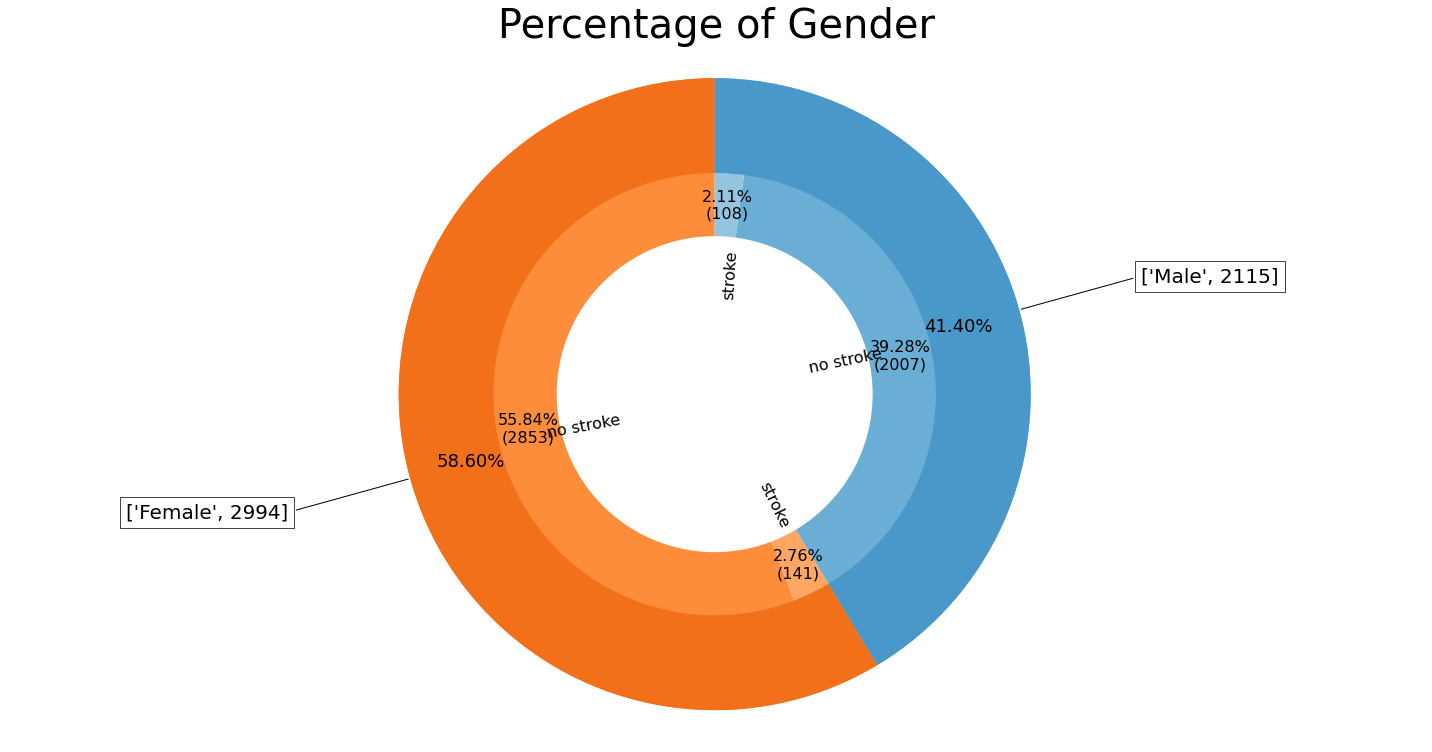

In [ ]:
#Gender & stroke chart
fig, ax = plt.subplots(figsize = (20, 10))

# Data to plot
sizes = df['gender'].value_counts()
labels = ['Female', 'Male']
labels_decision = ['no stroke','stroke','no stroke','stroke']

sizes1=[2853,141,2007,108]
a, b=[plt.cm.Oranges, plt.cm.Blues]
colors= [a(0.6), b(0.6)]
colors_gender = [a(0.5), a(0.4), b(0.5), b(0.4)]

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

#Plot
pie2= ax.pie(sizes1, labels=labels_decision,colors=colors_gender,startangle=90,wedgeprops=dict(width=0.5), autopct=make_autopct(sizes1), pctdistance=0.6, labeldistance=0.3, textprops={'fontsize': 16},rotatelabels=270)

wedges, texts,t = ax.pie(sizes, startangle=90,wedgeprops=dict(width=0.3),colors=colors,autopct='%.2f%%', pctdistance=0.8, textprops={'fontsize': 18})


bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate([labels[i],sizes[i]], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw, size=20)


plt.axis('equal')
plt.tight_layout()
plt.title('Percentage of Gender', size=40)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

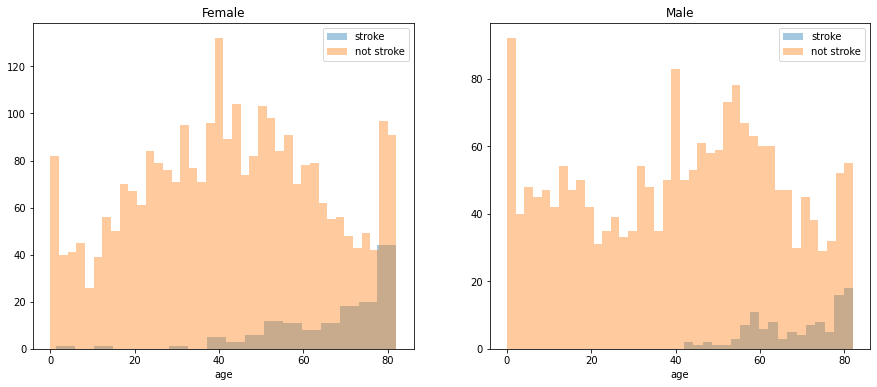

In [ ]:
#Gender, age, stroke chart
stroke= 'stroke'
not_stroke = 'not stroke'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 6))
women = df[df['gender']=='Female']
men = df[df['gender']=='Male']
ax = sns.distplot(women[women['stroke']==1].age.dropna(), bins=18, label = stroke, ax = axes[0], kde =False)
ax = sns.distplot(women[women['stroke']==0].age.dropna(), bins=40, label = not_stroke, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['stroke']==1].age.dropna(), bins=18, label = stroke, ax = axes[1], kde = False)
ax = sns.distplot(men[men['stroke']==0].age.dropna(), bins=40, label = not_stroke, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

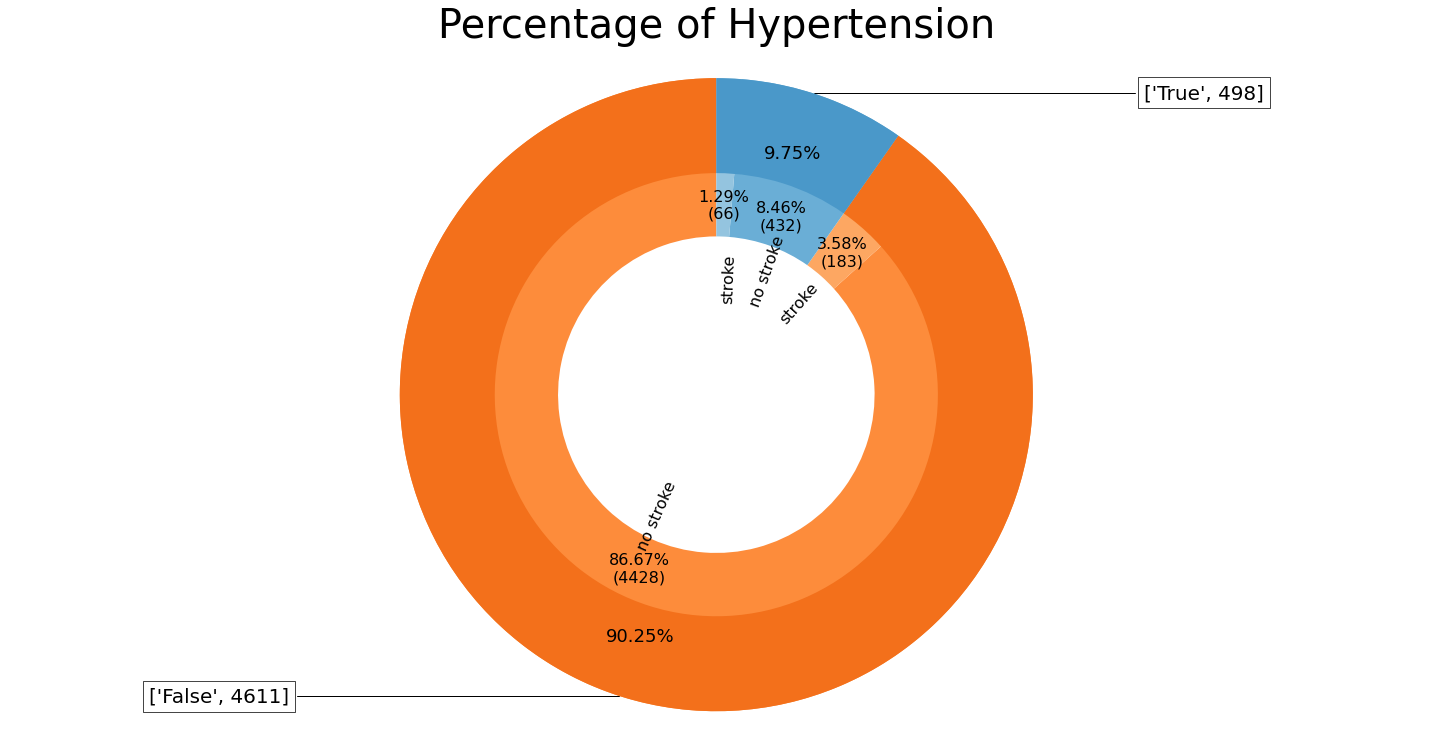

In [ ]:
#Hypertension & stroke chart
fig, ax = plt.subplots(figsize = (20, 10))

# Data to plot
sizes = df['hypertension'].value_counts()
labels = ['False', 'True']
labels_decision = ['no stroke','stroke','no stroke','stroke']
# sizes1 = df[['gender','stroke']].value_counts()
sizes1=[4428,183,432,66]
a, b=[plt.cm.Oranges, plt.cm.Blues]
colors= [a(0.6), b(0.6)]
colors_gender = [a(0.5), a(0.4), b(0.5), b(0.4)]
# explode = (0.2,0.2,0.2,0.2) 
# explode_gender = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

#Plot
pie2= ax.pie(sizes1, labels=labels_decision,colors=colors_gender,startangle=90,wedgeprops=dict(width=0.5), autopct=make_autopct(sizes1), pctdistance=0.6, labeldistance=0.29, textprops={'fontsize': 16},rotatelabels=270)

wedges, texts,t = ax.pie(sizes, startangle=90,wedgeprops=dict(width=0.3),colors=colors,autopct='%.2f%%', pctdistance=0.8, textprops={'fontsize': 18})


bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate([labels[i],sizes[i]], xy=(x, y), xytext=(1.35*np.sign(x), 1*y),
                horizontalalignment=horizontalalignment, **kw, size=20)


plt.axis('equal')
plt.tight_layout()
plt.title('Percentage of Hypertension', size=40)
plt.show()


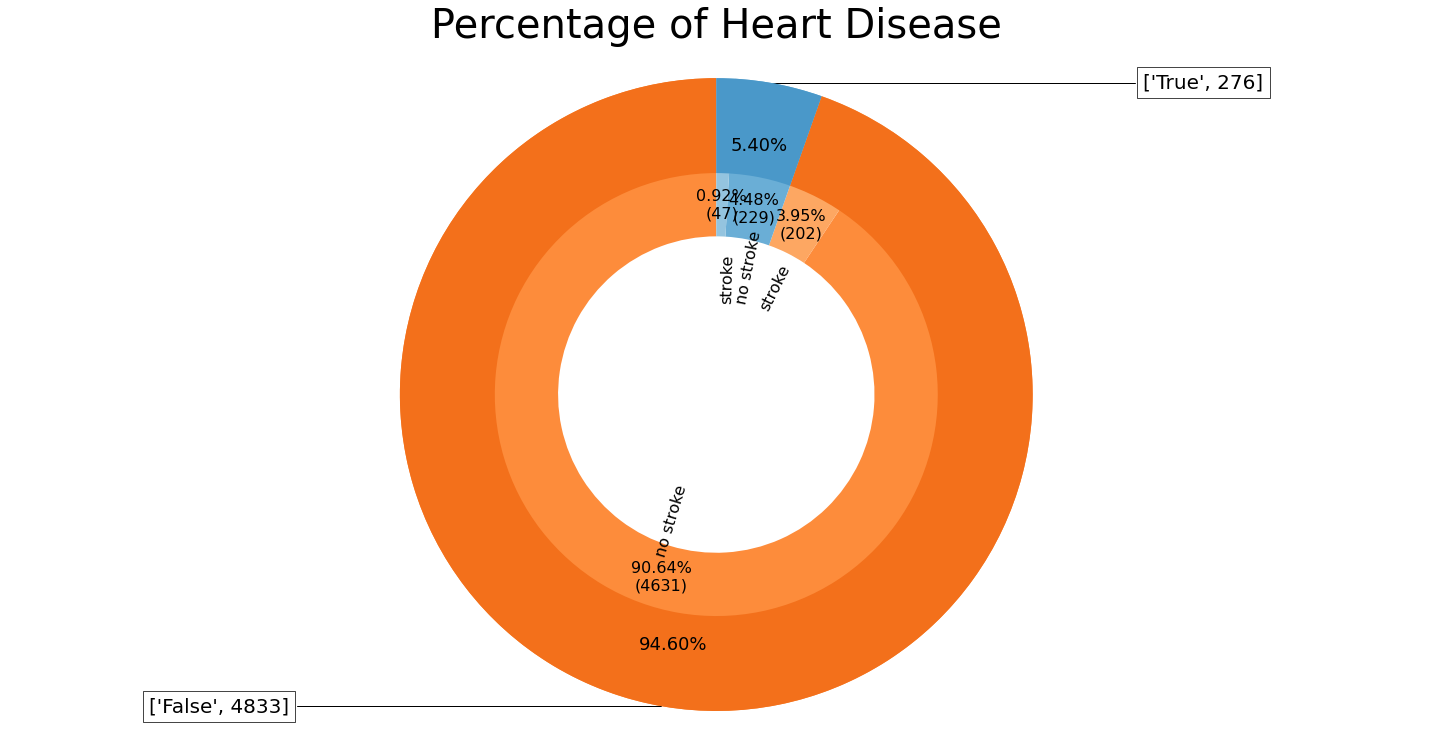

In [ ]:
#Heart disease & stroke chart
fig, ax = plt.subplots(figsize = (20, 10))

# Data to plot
sizes = df['heart_disease'].value_counts()
labels = ['False', 'True']
labels_decision = ['no stroke','stroke','no stroke','stroke']

sizes1=[4631,202,229,47]
a, b=[plt.cm.Oranges, plt.cm.Blues]
colors= [a(0.6), b(0.6)]
colors_gender = [a(0.5), a(0.4), b(0.5), b(0.4)]

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

#Plot
pie2= ax.pie(sizes1, labels=labels_decision,colors=colors_gender,startangle=90,wedgeprops=dict(width=0.5), autopct=make_autopct(sizes1), pctdistance=0.6, labeldistance=0.29, textprops={'fontsize': 16},rotatelabels=270)

wedges, texts,t = ax.pie(sizes, startangle=90,wedgeprops=dict(width=0.3),colors=colors,autopct='%.2f%%', pctdistance=0.8, textprops={'fontsize': 18})

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate([labels[i],sizes[i]], xy=(x, y), xytext=(1.35*np.sign(x), 1*y),
                horizontalalignment=horizontalalignment, **kw, size=20)


plt.axis('equal')
plt.tight_layout()
plt.title('Percentage of Heart Disease', size=40)
plt.show()

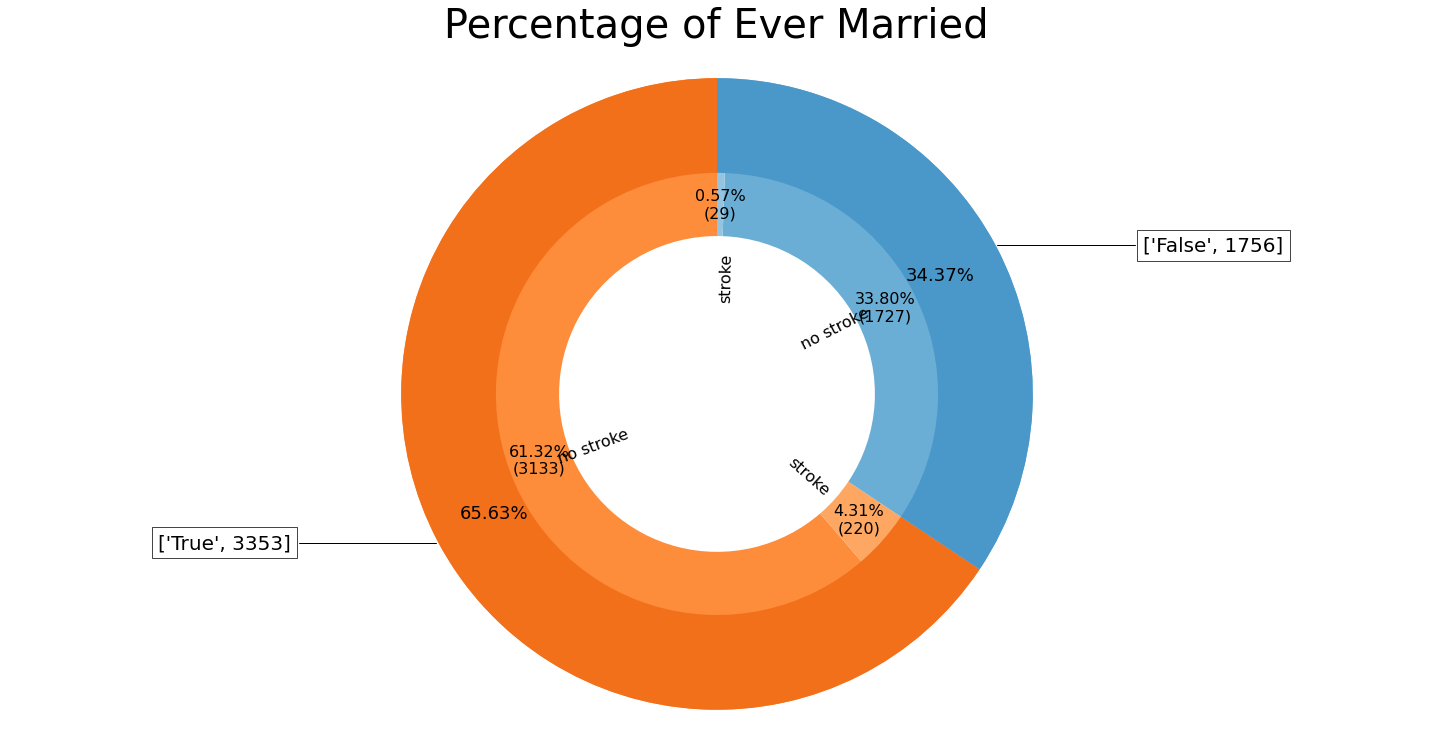

In [ ]:
#EverMarried & Stroke Chart
fig, ax = plt.subplots(figsize = (20, 10))

# Data to plot
sizes = df['ever_married'].value_counts()
labels = ['True', 'False']
labels_decision = ['no stroke','stroke','no stroke','stroke']

sizes1=[3133,220,1727,29]
a, b=[plt.cm.Oranges, plt.cm.Blues]
colors= [a(0.6), b(0.6)]
colors_gender = [a(0.5), a(0.4), b(0.5), b(0.4)]

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

#Plot
pie2= ax.pie(sizes1, labels=labels_decision,colors=colors_gender,startangle=90,wedgeprops=dict(width=0.5), autopct=make_autopct(sizes1), pctdistance=0.6, labeldistance=0.29, textprops={'fontsize': 16},rotatelabels=270)

wedges, texts,t = ax.pie(sizes, startangle=90,wedgeprops=dict(width=0.3),colors=colors,autopct='%.2f%%', pctdistance=0.8, textprops={'fontsize': 18})

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate([labels[i],sizes[i]], xy=(x, y), xytext=(1.35*np.sign(x), 1*y),
                horizontalalignment=horizontalalignment, **kw, size=20)


plt.axis('equal')
plt.tight_layout()
plt.title('Percentage of Ever Married', size=40)
plt.show()

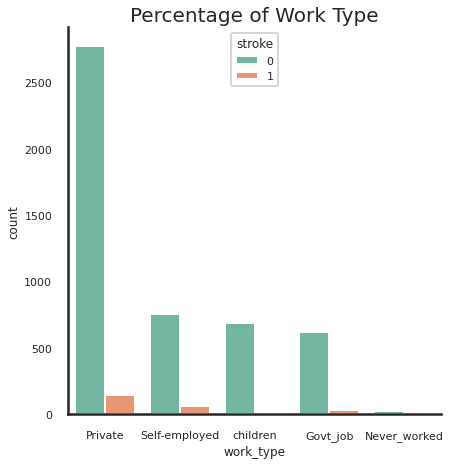

In [ ]:
#WorkType Chart
fig = plt.figure(figsize=(14,11))
gs = fig.add_gridspec(3,4)
sns.set_style("white")
sns.set_context("poster", font_scale = 0.5)

ax_gender_stroke = fig.add_subplot(gs[:2,:2])
sns.countplot(x='work_type', hue='stroke', data=df, ax=ax_gender_stroke, palette='Set2',order = df['work_type'].value_counts().index)
sns.despine()

# ax_gender_stroke = fig.add_subplot(gs[:2,2:4], sharey=ax_gender_stroke)
# sns.countplot(x='stroke', hue='work_type', data=df, ax=ax_gender_stroke, palette='Set2')
# sns.despine()

plt.title('Percentage of Work Type', size=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


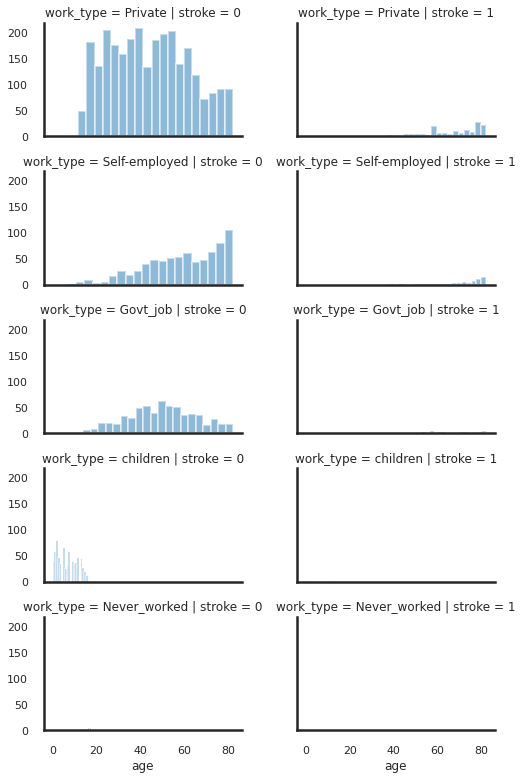

In [ ]:
#WorkType Chart
grid = sns.FacetGrid(df, col='stroke', row='work_type', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

In [ ]:
#replace value children menjadi Never_worked
df.replace(to_replace='children',value='Never_worked',inplace=True)

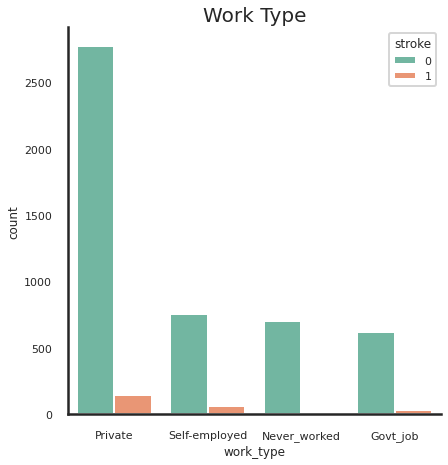

In [ ]:
#WorkType Chart after converted
fig = plt.figure(figsize=(14,11))
gs = fig.add_gridspec(3,4)
sns.set_style("white")
sns.set_context("poster", font_scale = 0.5)

ax_gender_stroke = fig.add_subplot(gs[:2,:2])
sns.countplot(x='work_type', hue='stroke', data=df, ax=ax_gender_stroke, palette='Set2',order = df['work_type'].value_counts().index)
sns.despine()

# ax_gender_stroke = fig.add_subplot(gs[:2,2:4], sharey=ax_gender_stroke)
# sns.countplot(x='stroke', hue='work_type', data=df, ax=ax_gender_stroke, palette='Set2')
# sns.despine()

plt.title('Work Type', size=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


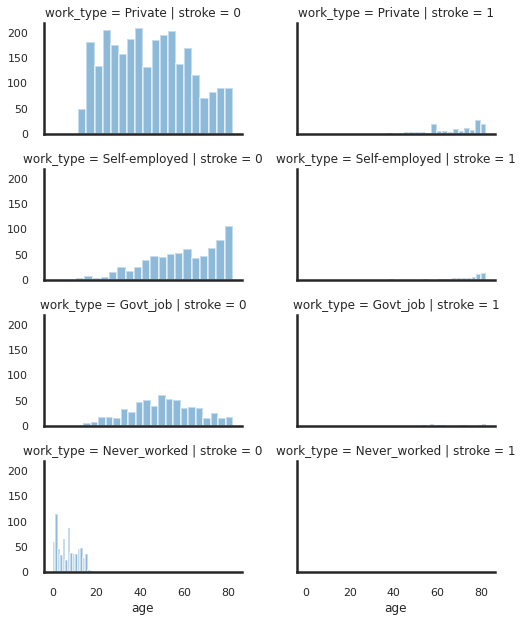

In [ ]:
#WorkType Chart after converted
grid = sns.FacetGrid(df, col='stroke', row='work_type', size=2.2, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

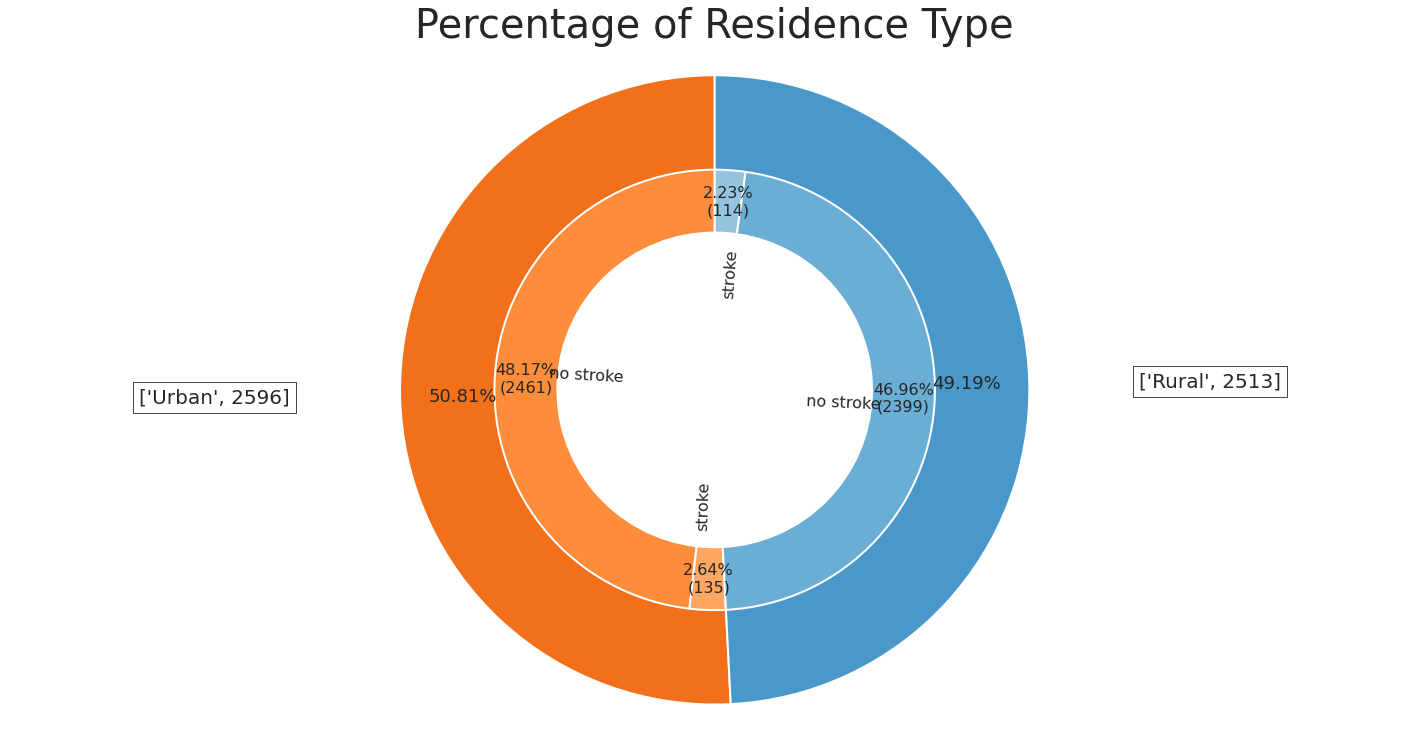

In [ ]:
#WorkType & Stress chart
fig, ax = plt.subplots(figsize = (20, 10))

# Data to plot
sizes = df['Residence_type'].value_counts()
labels = ['Urban', 'Rural']
labels_decision = ['no stroke','stroke','no stroke','stroke']

sizes1=[2461,135,2399,114]
# size check on: print(Counter(df[df.Residence_type == 'Urban']))
a, b=[plt.cm.Oranges, plt.cm.Blues]
colors= [a(0.6), b(0.6)]
colors_gender = [a(0.5), a(0.4), b(0.5), b(0.4)]

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

#Plot
pie2= ax.pie(sizes1, labels=labels_decision,colors=colors_gender,startangle=90,wedgeprops=dict(width=0.5), autopct=make_autopct(sizes1), pctdistance=0.6, labeldistance=0.29, textprops={'fontsize': 16},rotatelabels=270)

wedges, texts,t = ax.pie(sizes, startangle=90,wedgeprops=dict(width=0.3),colors=colors,autopct='%.2f%%', pctdistance=0.8, textprops={'fontsize': 18})

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate([labels[i],sizes[i]], xy=(x, y), xytext=(1.35*np.sign(x), 1*y),
                horizontalalignment=horizontalalignment, **kw, size=20)


plt.axis('equal')
plt.tight_layout()
plt.title('Percentage of Residence Type', size=40)
plt.show()

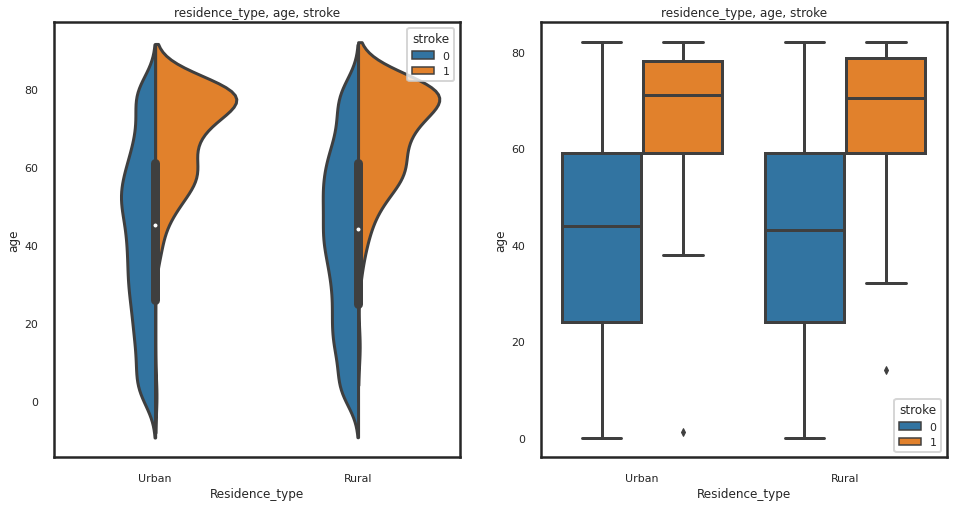

In [ ]:
#residence_type, age, stroke chart
sns.set_style("white")
fig, ax= plt.subplots(1, 2, figsize=(16,8))

sns.violinplot(x='Residence_type', y='age', hue='stroke', data=df, split=True, ax=ax[0])
sns.boxplot(x='Residence_type', y='age', hue='stroke', data=df, ax=ax[1])

ax[0].set_title('residence_type, age, stroke')
ax[1].set_title('residence_type, age, stroke')

plt.show()

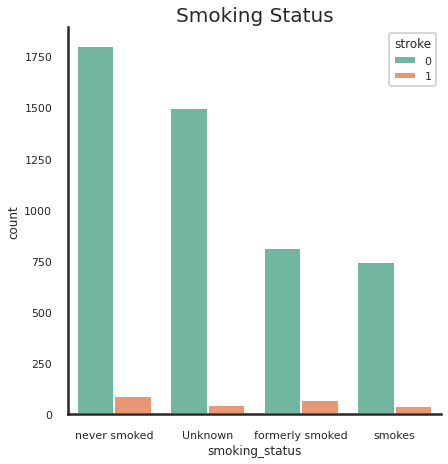

In [ ]:
#Smoking chart
fig = plt.figure(figsize=(14,11))
gs = fig.add_gridspec(3,4)
sns.set_style("white")
sns.set_context("poster", font_scale = 0.5)


ax_gender_stroke = fig.add_subplot(gs[:2,:2])
sns.countplot(x='smoking_status', hue='stroke', data=df, ax=ax_gender_stroke, palette='Set2',order = df['smoking_status'].value_counts().index)
sns.despine()

plt.title('Smoking Status', size=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


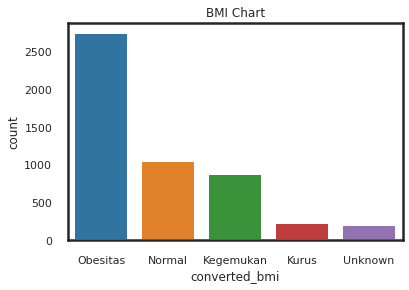

In [ ]:
#BMI chart
sns.countplot(df['converted_bmi'], order = df['converted_bmi'].value_counts().index)
plt.title('BMI Chart')
plt.show()

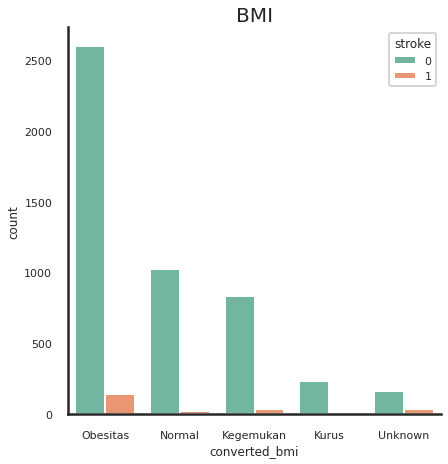

In [ ]:
#BMI chart
fig = plt.figure(figsize=(14,11))
gs = fig.add_gridspec(3,4)
sns.set_style("white")
sns.set_context("poster", font_scale = 0.5)


ax_gender_stroke = fig.add_subplot(gs[:2,:2])
sns.countplot(x='converted_bmi', hue='stroke', data=df, ax=ax_gender_stroke, palette='Set2',order = df['converted_bmi'].value_counts().index)
sns.despine()

plt.title('BMI', size=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

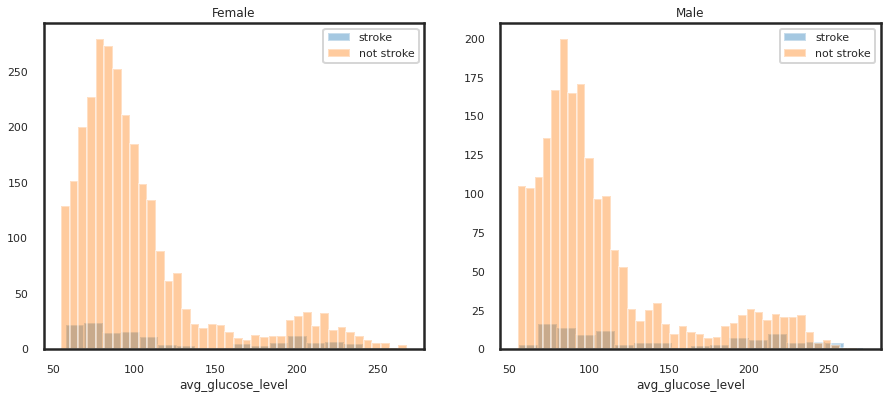

In [ ]:
#Stroke, glucose level & gender chart

stroke= 'stroke'
not_stroke = 'not stroke'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 6))
women = df[df['gender']=='Female']
men = df[df['gender']=='Male']
ax = sns.distplot(women[women['stroke']==1].avg_glucose_level.dropna(), bins=18, label = stroke, ax = axes[0], kde =False)
ax = sns.distplot(women[women['stroke']==0].avg_glucose_level.dropna(), bins=40, label = not_stroke, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['stroke']==1].avg_glucose_level.dropna(), bins=18, label = stroke, ax = axes[1], kde = False)
ax = sns.distplot(men[men['stroke']==0].avg_glucose_level.dropna(), bins=40, label = not_stroke, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

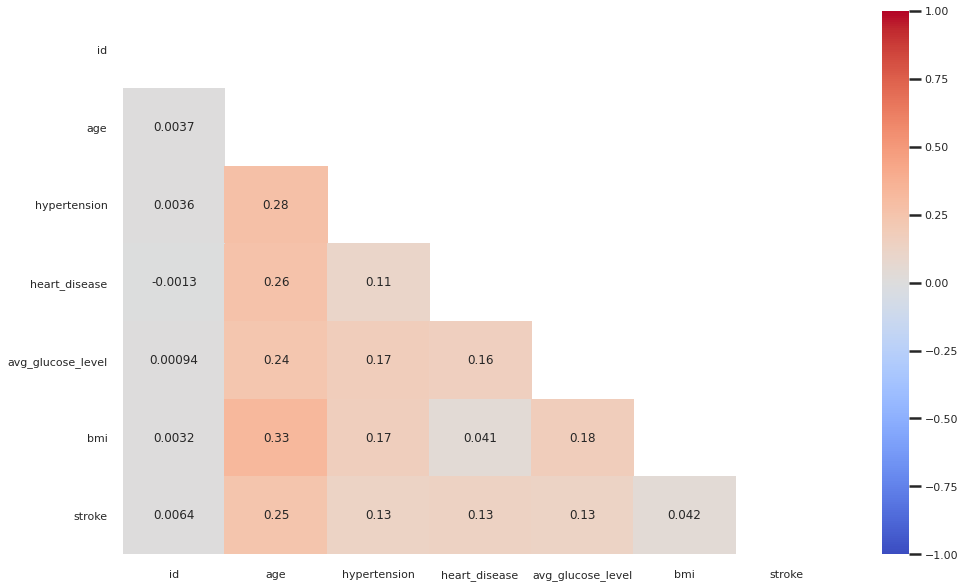

In [ ]:
#correlation chart

dfcorr = df.copy()
plt.figure(figsize=(16,10))
matrix = np.triu(df.corr(method='pearson'))
sns.heatmap(df.corr(method='pearson'), annot=True,cmap='coolwarm',vmin= -1,vmax=1, mask=matrix)

#Data Preprocessing

In [ ]:
#check data
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,converted_bmi
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Obesitas
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Unknown
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Obesitas
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Obesitas
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Kegemukan


In [ ]:
#drop id & bmi column
df.drop(columns=['id','bmi'],inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,converted_bmi
0,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1,Obesitas
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1,Unknown
2,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1,Obesitas
3,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1,Obesitas
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1,Kegemukan


In [ ]:
#changing text to binary
df['gender']=df['gender'].map({'Male':0,'Female':1})
df['ever_married']= df['ever_married'].map({'No':0,'Yes':1})
df['Residence_type']=df['Residence_type'].map({'Urban':0,'Rural':1})

In [ ]:
#one hot encoder
df=pd.get_dummies(df)
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,converted_bmi_Kurus,converted_bmi_Normal,converted_bmi_Kegemukan,converted_bmi_Obesitas,converted_bmi_Unknown
0,0,67.0,0,1,1,0,228.69,1,0,0,1,0,0,1,0,0,0,0,0,1,0
1,1,61.0,0,0,1,1,202.21,1,0,0,0,1,0,0,1,0,0,0,0,0,1
2,0,80.0,0,1,1,1,105.92,1,0,0,1,0,0,0,1,0,0,0,0,1,0
3,1,49.0,0,0,1,0,171.23,1,0,0,1,0,0,0,0,1,0,0,0,1,0
4,1,79.0,1,0,1,1,174.12,1,0,0,0,1,0,0,1,0,0,0,1,0,0


In [ ]:
df= df.drop(['smoking_status_Unknown', 'converted_bmi_Unknown'], axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,converted_bmi_Kurus,converted_bmi_Normal,converted_bmi_Kegemukan,converted_bmi_Obesitas
0,0,67.0,0,1,1,0,228.69,1,0,0,1,0,1,0,0,0,0,0,1
1,1,61.0,0,0,1,1,202.21,1,0,0,0,1,0,1,0,0,0,0,0
2,0,80.0,0,1,1,1,105.92,1,0,0,1,0,0,1,0,0,0,0,1
3,1,49.0,0,0,1,0,171.23,1,0,0,1,0,0,0,1,0,0,0,1
4,1,79.0,1,0,1,1,174.12,1,0,0,0,1,0,1,0,0,0,1,0


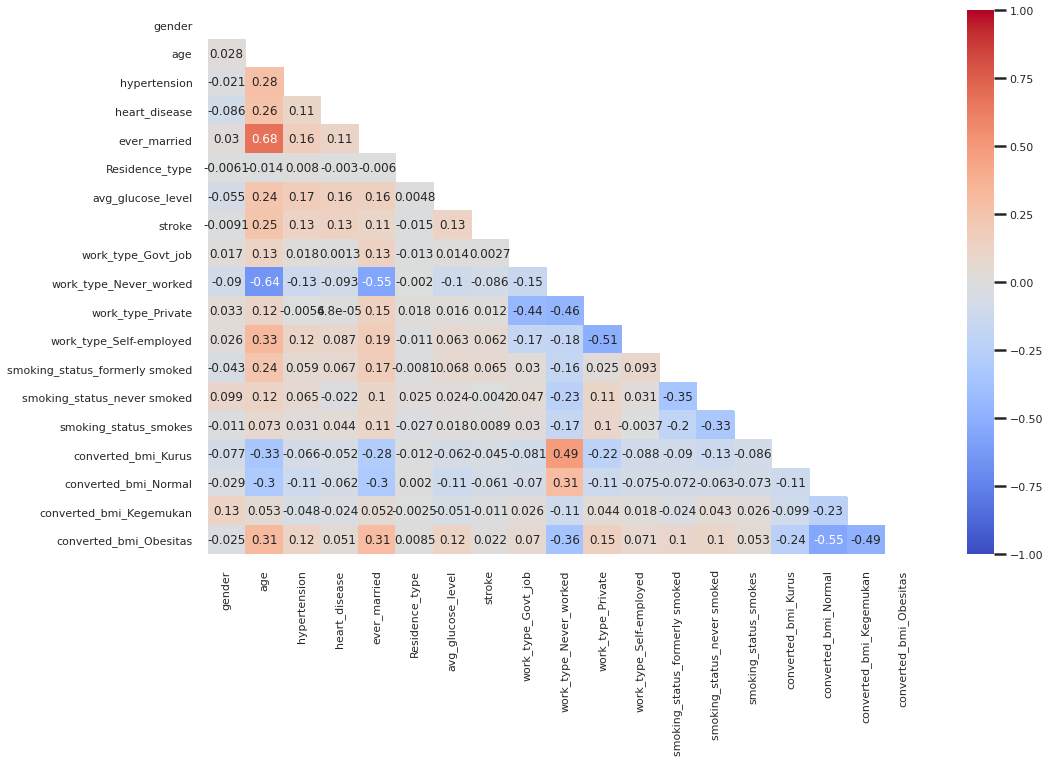

In [ ]:
plt.figure(figsize=(16,10))
matrix = np.triu(df.corr(method='pearson'))
sns.heatmap(df.corr(method='pearson'), annot=True,cmap='coolwarm',vmin= -1,vmax=1, mask=matrix)

In [ ]:
#standarization data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df) 
scaled_data= pd.DataFrame(scaled_data,columns = df.columns)
scaled_data

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,converted_bmi_Kurus,converted_bmi_Normal,converted_bmi_Kegemukan,converted_bmi_Obesitas
0,-1.189791,1.051242,-0.328637,4.184599,0.723678,-0.983884,2.706450,4.417926,-0.384154,-0.401418,0.864444,-0.436931,2.186187,-0.766893,-0.427363,-0.218598,-0.509525,-0.454599,0.927279
1,0.840484,0.785889,-0.328637,-0.238972,0.723678,1.016380,2.121652,4.417926,-0.384154,-0.401418,-1.156812,2.288689,-0.457417,1.303962,-0.427363,-0.218598,-0.509525,-0.454599,-1.078424
2,-1.189791,1.626174,-0.328637,4.184599,0.723678,1.016380,-0.004867,4.417926,-0.384154,-0.401418,0.864444,-0.436931,-0.457417,1.303962,-0.427363,-0.218598,-0.509525,-0.454599,0.927279
3,0.840484,0.255182,-0.328637,-0.238972,0.723678,-0.983884,1.437473,4.417926,-0.384154,-0.401418,0.864444,-0.436931,-0.457417,-0.766893,2.339933,-0.218598,-0.509525,-0.454599,0.927279
4,0.840484,1.581949,3.042866,-0.238972,0.723678,1.016380,1.501297,4.417926,-0.384154,-0.401418,-1.156812,2.288689,-0.457417,1.303962,-0.427363,-0.218598,-0.509525,2.199740,-1.078424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,0.840484,1.626174,3.042866,-0.238972,0.723678,-0.983884,-0.494481,-0.226351,-0.384154,-0.401418,0.864444,-0.436931,-0.457417,1.303962,-0.427363,-0.218598,-0.509525,-0.454599,-1.078424
5105,0.840484,1.670400,-0.328637,-0.238972,0.723678,-0.983884,0.420922,-0.226351,-0.384154,-0.401418,-1.156812,2.288689,-0.457417,1.303962,-0.427363,-0.218598,-0.509525,-0.454599,0.927279
5106,0.840484,-0.363976,-0.328637,-0.238972,0.723678,1.016380,-0.511266,-0.226351,-0.384154,-0.401418,-1.156812,2.288689,-0.457417,1.303962,-0.427363,-0.218598,-0.509525,-0.454599,0.927279
5107,-1.189791,0.343633,-0.328637,-0.238972,0.723678,1.016380,1.328375,-0.226351,-0.384154,-0.401418,0.864444,-0.436931,2.186187,-0.766893,-0.427363,-0.218598,-0.509525,2.199740,-1.078424


In [ ]:
#separate future data and target data
X=df.drop(['stroke'],1)
y=df['stroke']

In [ ]:
#splitting dataset
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, stratify=y, random_state=0)

In [ ]:
Counter(y_train)

Counter({0: 3888, 1: 199})

In [ ]:
Counter(y_test)

Counter({0: 972, 1: 50})

In [ ]:
#handling imbalance dataset

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# X_smote.value_counts()
Counter(y_test)

Counter({0: 972, 1: 50})

In [ ]:
print(len(X_smote))
print(len(X_test))

7776
1022


#Model

In [ ]:
def calculate_sensitivity_specificity(y_test, y_pred_test):
    # Note: More parameters are defined than necessary. 
    # This would allow return of other measures other than sensitivity and specificity
    
    # Get true/false for whether a breach actually occurred
    actual_pos = y_test == 1
    actual_neg = y_test == 0
    
    # Get true and false test (true test match actual, false tests differ from actual)
    true_pos = (y_pred_test == 1) & (actual_pos)
    false_pos = (y_pred_test == 1) & (actual_neg)
    true_neg = (y_pred_test == 0) & (actual_neg)
    false_neg = (y_pred_test == 0) & (actual_pos)
    
    # Calculate accuracy
    accuracy = round(np.mean(y_pred_test == y_test),4) *100
    
    # Calculate sensitivity and specificity
    sensitivity = round((np.sum(true_pos) / np.sum(actual_pos)),4) *100
    specificity = round((np.sum(true_neg) / np.sum(actual_neg)),4) *100
    
    return sensitivity, specificity, accuracy

In [ ]:
#model naive bayes
gnb = GaussianNB()
gnb = gnb.fit(X_smote,y_smote)

y_pred_test = gnb.predict(X_test)

gnb_sensitivity, gnb_specificity, gnb_accuracy = calculate_sensitivity_specificity(y_test, y_pred_test)

gnb_probs_test = gnb.predict_proba(X_test)
gnb_probs_test = gnb_probs_test[:, 1]
gnb_auc_test = round(roc_auc_score(y_test, gnb_probs_test),4)*100

gnb_probs_train = gnb.predict_proba(X_smote)
gnb_probs_train = gnb_probs_train[:, 1]
gnb_auc_train = round(roc_auc_score(y_smote, gnb_probs_train),4)*100


print ('Sensitivity:', gnb_sensitivity)
print ('Specificity:', gnb_specificity)
print ('Accuracy:', gnb_accuracy)
print('ROC score train:', gnb_auc_train)
print('ROC score test: ',gnb_auc_test)

Sensitivity: 90.0
Specificity: 50.82
Accuracy: 52.739999999999995
ROC score train: 83.84
ROC score test:  78.45


In [ ]:
#model random forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_smote,y_smote)

y_pred_test = random_forest.predict(X_test)

rdf_probs_test = random_forest.predict_proba(X_test)
rdf_probs_test = rdf_probs_test[:, 1]
rdf_auc_test = round(roc_auc_score(y_test, rdf_probs_test),4)*100

rdf_probs_train = random_forest.predict_proba(X_smote)
rdf_probs_train = rdf_probs_train[:, 1]
rdf_auc_train = round(roc_auc_score(y_smote, rdf_probs_train),4)*100

rdf_sensitivity, rdf_specificity, rdf_accuracy = calculate_sensitivity_specificity(y_test, y_pred_test)


print ('Sensitivity:', rdf_sensitivity)
print ('Specificity:', rdf_specificity)
print ('Accuracy:', rdf_accuracy)
print('ROC score train:', rdf_auc_train)
print('ROC score test: ',rdf_auc_test)

Sensitivity: 2.0
Specificity: 99.69
Accuracy: 94.91000000000001
ROC score train: 100.0
ROC score test:  74.9


In [ ]:
#model logistic regression
logreg = LogisticRegression()
logreg.fit(X_smote,y_smote)

y_pred_test = logreg.predict(X_test)

logreg_probs_test = logreg.predict_proba(X_test)
logreg_probs_test = logreg_probs_test[:, 1]
logreg_auc_test = round(roc_auc_score(y_test, logreg_probs_test),4)*100

logreg_probs_train = logreg.predict_proba(X_smote)
logreg_probs_train = logreg_probs_train[:, 1]
logreg_auc_train = round(roc_auc_score(y_smote, logreg_probs_train),4)*100

logreg_sensitivity, logreg_specificity, logreg_accuracy = calculate_sensitivity_specificity(y_test, y_pred_test)
print ('Sensitivity:', logreg_sensitivity)
print ('Specificity:', logreg_specificity)
print ('Accuracy:', logreg_accuracy)
print('ROC score train:', logreg_auc_train)
print('ROC score test: ', logreg_auc_test)

Sensitivity: 68.0
Specificity: 75.41
Accuracy: 75.05
ROC score train: 87.5
ROC score test:  81.38


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#model KNeigboars
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_smote,y_smote)

y_pred_test=knn.predict(X_test)

knn_probs_test = knn.predict_proba(X_test)
knn_probs_test = knn_probs_test[:, 1]
knn_auc_test = round(roc_auc_score(y_test, knn_probs_test),4)*100

knn_probs_train = knn.predict_proba(X_smote)
knn_probs_train = knn_probs_train[:, 1]
knn_auc_train = round(roc_auc_score(y_smote, knn_probs_train),4)*100

knn_sensitivity, knn_specificity, knn_accuracy = calculate_sensitivity_specificity(y_test, y_pred_test)
print ('Sensitivity:', knn_sensitivity)
print ('Specificity:', knn_specificity)
print ('Accuracy:', knn_accuracy)
print('ROC score train:', knn_auc_train)
print('ROC score test: ',knn_auc_test)

Sensitivity: 56.00000000000001
Specificity: 77.25999999999999
Accuracy: 76.22
ROC score train: 99.19
ROC score test:  70.56


In [ ]:
# model decision tree
dt =DecisionTreeClassifier()
dt.fit(X_smote,y_smote)

y_pred_test =dt.predict(X_test)

dt_probs_test = dt.predict_proba(X_test)
dt_probs_test = dt_probs_test[:, 1]
dt_auc_test = round(roc_auc_score(y_test, dt_probs_test),4)*100

dt_probs_train = dt.predict_proba(X_smote)
dt_probs_train = dt_probs_train[:, 1]
dt_auc_train = round(roc_auc_score(y_smote, dt_probs_train),4)*100

dt_sensitivity, dt_specificity, dt_accuracy = calculate_sensitivity_specificity(y_test, y_pred_test)
print ('Sensitivity:', dt_sensitivity)
print ('Specificity:', dt_specificity)
print ('Accuracy:', dt_accuracy)
print('ROC score train:', dt_auc_train)
print('ROC score test: ', dt_auc_test)

Sensitivity: 8.0
Specificity: 93.72
Accuracy: 89.53
ROC score train: 100.0
ROC score test:  50.86000000000001


In [ ]:
#model SVC
svc=SVC(probability=True)
svc.fit(X_smote,y_smote)

y_pred_test=svc.predict(X_test)

svc_sensitivity, svc_specificity, svc_accuracy = calculate_sensitivity_specificity(y_test, y_pred_test)

svc_probs_test = svc.predict_proba(X_test)
svc_probs_test = svc_probs_test[:, 1]
svc_auc_test = round(roc_auc_score(y_test, svc_probs_test),4)*100

svc_probs_train = svc.predict_proba(X_smote)
svc_probs_train = svc_probs_train[:, 1]
svc_auc_train = round(roc_auc_score(y_smote, svc_probs_train),4)*100

print ('Sensitivity:', svc_sensitivity)
print ('Specificity:', svc_specificity)
print ('Accuracy:', svc_accuracy)
print('ROC score train:', svc_auc_train)
print('ROC score test: ', svc_auc_test)

Sensitivity: 70.0
Specificity: 70.88
Accuracy: 70.84
ROC score train: 85.50999999999999
ROC score test:  79.62


#Chosing Model

In [ ]:
result = pd.DataFrame({
    'Model' : ['model_naive_bayes','model_random_forest','model_logistic_regression','model_knn','model_Desicion tree','model_svc'],
    'ROC_Score_test' : [gnb_auc_test,rdf_auc_test, logreg_auc_test, knn_auc_test,dt_auc_test,svc_auc_test],
    'ROC_Score_train' : [gnb_auc_train,rdf_auc_train, logreg_auc_train, knn_auc_train,dt_auc_train,svc_auc_train],    
    'Sensitivity' : [gnb_sensitivity,rdf_sensitivity, logreg_sensitivity, knn_sensitivity,dt_sensitivity,svc_sensitivity],
    'Specificity' : [gnb_specificity,rdf_specificity, logreg_specificity, knn_specificity,dt_specificity,svc_specificity],
    'Accuracy' : [gnb_accuracy,rdf_accuracy, logreg_accuracy, knn_accuracy, dt_accuracy,svc_accuracy]
})
result_df=result.sort_values(by='ROC_Score_test',ascending=False)
result_df

,Model,ROC_Score_test,ROC_Score_train,Sensitivity,Specificity,Accuracy
2,model_logistic_regression,81.38,87.50,68.0,75.41,75.05
5,model_svc,79.62,85.51,70.0,70.88,70.84
0,model_naive_bayes,78.45,83.84,90.0,50.82,52.74
1,model_random_forest,74.90,100.00,2.0,99.69,94.91
3,model_knn,70.56,99.19,56.0,77.26,76.22
4,model_Desicion tree,50.86,100.00,8.0,93.72,89.53


Model yang dipilih untuk hyperparameter tuning: model logistic regression & model svc

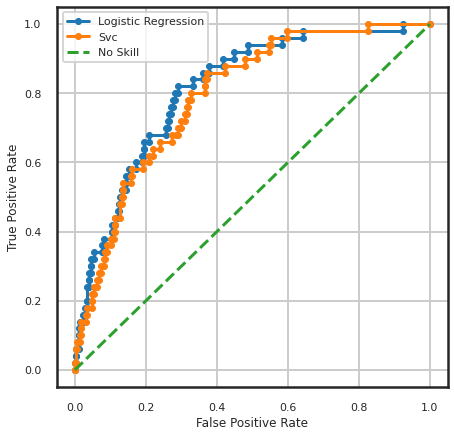

In [ ]:
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(111)

ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs_test)
svc_fpr, svc_tpr, _ = roc_curve(y_test, svc_probs_test)

# plot the roc curve for the model
# pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(logreg_fpr, logreg_tpr, marker='.', label='Logistic Regression')
plt.plot(svc_fpr, svc_tpr, marker='.', label='Svc')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#adding gridlines
ax1.grid(True, which='both')

# show the legend
plt.legend()

# show the plot
plt.show()

#Hyperparameter Tuning

Hyperparameter Model LogisticRegression

In [ ]:
#List of  Hyperparameters for tested 
penalty = ['l1', 'l2']
C = np.logspace(-4,4,20)

hyperparameters = dict(penalty=penalty, C=C)

logreg = LogisticRegression()

In [ ]:
#cv for cross validation
clf = GridSearchCV(logreg, hyperparameters, cv=2,scoring='roc_auc')

In [ ]:
# print best parameter after tuning
print(clf.best_params_)

# print how our model looks after hyper-parameter tuning
print(clf.best_estimator_)

{'C': 78.47599703514607, 'penalty': 'l2'}
LogisticRegression(C=78.47599703514607, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
#fit Model 
best_model = clf.fit(X_smote,y_smote)

y_pred_test = best_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_se

In [ ]:
logreg_probs_test = best_model.predict_proba(X_test)
logreg_probs_test = logreg_probs_test[:, 1]
logreg_auc_test = round(roc_auc_score(y_test, logreg_probs_test),4)*100

logreg_probs_train = best_model.predict_proba(X_smote)
logreg_probs_train = logreg_probs_train[:, 1]
logreg_auc_train = round(roc_auc_score(y_smote, logreg_probs_train),4)*100

In [ ]:
#Print Result
logreg_sensitivity, logreg_specificity, logreg_accuracy = calculate_sensitivity_specificity(y_test, y_pred_test)

print ('Sensitivity:', logreg_sensitivity)
print ('Specificity:', logreg_specificity)
print ('Accuracy:', logreg_accuracy)
print('ROC score train:', logreg_auc_train)
print('ROC score test: ', logreg_auc_test)

Sensitivity: 68.0
Specificity: 75.51
Accuracy: 75.14999999999999
ROC score train: 87.53999999999999
ROC score test:  81.38


In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.76      0.85       972
           1       0.12      0.68      0.21        50

    accuracy                           0.75      1022
   macro avg       0.55      0.72      0.53      1022
weighted avg       0.94      0.75      0.82      1022



Hyperparameter SVC

In [ ]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
			'gamma': [0.005,0.0005, 0.001, 0.0001],
			'kernel': ['rbf']}

grid = GridSearchCV(SVC(probability=True), param_grid, refit = True, verbose = 3,scoring='roc_auc',cv=10)

# fitting the model for grid search
grid.fit(X_smote, y_smote)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV] C=0.1, gamma=0.005, kernel=rbf ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... C=0.1, gamma=0.005, kernel=rbf, score=0.865, total=  10.7s
[CV] C=0.1, gamma=0.005, kernel=rbf ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.7s remaining:    0.0s


[CV] ...... C=0.1, gamma=0.005, kernel=rbf, score=0.889, total=  10.7s
[CV] C=0.1, gamma=0.005, kernel=rbf ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   21.4s remaining:    0.0s


[CV] ...... C=0.1, gamma=0.005, kernel=rbf, score=0.905, total=  10.9s
[CV] C=0.1, gamma=0.005, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.005, kernel=rbf, score=0.886, total=  10.7s
[CV] C=0.1, gamma=0.005, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.005, kernel=rbf, score=0.893, total=  10.8s
[CV] C=0.1, gamma=0.005, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.005, kernel=rbf, score=0.861, total=  10.6s
[CV] C=0.1, gamma=0.005, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.005, kernel=rbf, score=0.892, total=  10.7s
[CV] C=0.1, gamma=0.005, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.005, kernel=rbf, score=0.859, total=  10.7s
[CV] C=0.1, gamma=0.005, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.005, kernel=rbf, score=0.880, total=  10.7s
[CV] C=0.1, gamma=0.005, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 46.2min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.005, 0.0005, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.005, 'kernel': 'rbf'}
SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [ ]:
y_pred_test=grid.predict(X_test)

svc_sensitivity, svc_specificity, svc_accuracy = calculate_sensitivity_specificity(y_test, y_pred_test)

svc_probs_test = grid.predict_proba(X_test)
svc_probs_test = svc_probs_test[:, 1]
svc_auc_test = round(roc_auc_score(y_test, svc_probs_test),4)*100

svc_probs_train = grid.predict_proba(X_smote)
svc_probs_train = svc_probs_train[:, 1]
svc_auc_train = round(roc_auc_score(y_smote, svc_probs_train),4)*100

print ('Sensitivity:', svc_sensitivity)
print ('Specificity:', svc_specificity)
print ('Accuracy:', svc_accuracy)
print('ROC score train:', svc_auc_train)
print('ROC score test: ', svc_auc_test)

Sensitivity: 18.0
Specificity: 93.42
Accuracy: 89.73
ROC score train: 99.63
ROC score test:  65.22


In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       972
           1       0.10      0.16      0.12        50

    accuracy                           0.89      1022
   macro avg       0.53      0.54      0.53      1022
weighted avg       0.91      0.89      0.90      1022



In [ ]:
result = pd.DataFrame({
    'Model' : ['model_logistic_regression','model_svc'],
    'ROC_Score_test' : [logreg_auc_test, svc_auc_test],
    'ROC_Score_train' : [logreg_auc_train, svc_auc_train],    
    'Sensitivity' : [logreg_sensitivity, svc_sensitivity],
    'Specificity' : [logreg_specificity, svc_specificity],
    'Accuracy' : [logreg_accuracy, svc_accuracy]
})
result_df=result.sort_values(by='ROC_Score_test',ascending=False)
result_df

,Model,ROC_Score_test,ROC_Score_train,Sensitivity,Specificity,Accuracy
0,model_logistic_regression,81.38,87.54,68.0,75.51,75.15
1,model_svc,65.22,99.63,18.0,93.42,89.73


After hyperparameter tuning, choose logistic regression rather than svc since svc tends to overfit, meanshile in logistic regression ROC score tend to stable between 80-90


Hence, our model is **logistic regression**, with model:

LogisticRegression(C=78.47599703514607, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Getting: ROC train score 87.54%, ROC test score 81.38%, sensitivity 68.0%, specificity 75.51% and accuracy 75.15%